# Day 1: -

# imports 
this are the basic imports to start the EDA

In [61]:
import numpy as np
import pandas as pd

# Reads the CSV files
Loads the cricket dataset into Python for analysis, allowing operations like filtering, grouping, and visualization.

In [62]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [63]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [64]:
match.shape

(756, 18)

In [65]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [66]:
delivery.shape

(179078, 21)

# Use: Groups the dataset delivery by match_id and inning, then sums up the total_runs column.
Why: Helps calculate the total runs scored in each inning of every match, useful for match-level or inning-level analysis in cricket data.
we are getting a multi index series where we can read easily that match_id 1 have scored how many runs etc.

In [67]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [68]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


# 1st innings
here we are showing the 1st innings total runs

In [69]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [70]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


# merge
now we will merge the (match_id	,inning ,total_runs)(total_score_df) with the match data

In [71]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on = 'id', right_on = 'match_id')

In [72]:
match_df 

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


# Teams
here we are showing the total teams played in ipl

In [73]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

# Removing teams
We will remove and teams which are not playing now

In [74]:
teams = ['Sunrisers Hyderabad',
         'Mumbai Indians',
         'Royal Challengers Bangalore',
         'Kolkata Knight Riders',
         'Kings XI Punjab',
         'Chennai Super Kings',
         'Rajasthan Royals',
         'Delhi Capitals'
    
]

# Replace team name
i will replace team name which have changed there name but they are same

In [75]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

# Use: Filters match_df so that both team1 and team2 belong to the allowed list teams.
Why: Ensures only matches between valid/selected teams are kept for further analysis or modeling.

In [76]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [77]:
match_df.shape

(641, 20)

# Rain affected match
we will see how many matches are been affected by rain or any kind of climatic issue.

Helps quickly see the distribution of categories or values, useful for spotting dominant/rare values.

In [78]:
match_df['dl_applied'].value_counts()       

dl_applied
0    626
1     15
Name: count, dtype: int64

# Removing rain affected matches
now i have removed the colunm of rain affected matches

In [79]:
match_df = match_df[match_df['dl_applied'] == 0]

In [80]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


# Selects and displays only the specified columns (match_id, city, winner, total_runs) from match_df.
it will helps to focus on key information (match details, location, winner, and runs) without the full dataset clutter.

In [81]:
match_df[['match_id','city','winner','total_runs']]

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,207
4,5,Bangalore,Royal Challengers Bangalore,157
6,7,Mumbai,Mumbai Indians,178
7,8,Indore,Kings XI Punjab,148
9,10,Mumbai,Mumbai Indians,158
...,...,...,...,...
751,11347,Mumbai,Mumbai Indians,143
752,11412,Chennai,Mumbai Indians,136
753,11413,Visakhapatnam,Delhi Capitals,171
754,11414,Visakhapatnam,Chennai Super Kings,155


In [82]:
delivery_df = match_df.merge(delivery,on='match_id')

In [83]:
delivery_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


# 2nd innings
we are doing this to show the second innings

In [84]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [85]:
delivery_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [86]:
delivery_df.shape

(72413, 40)

In [87]:
delivery_df = delivery_df.copy()

In [88]:
delivery_df['total_runs_y'] = pd.to_numeric(delivery_df['total_runs_y'], errors='coerce')

# Add cumulative runs
we have to add

In [89]:
delivery_df['cumulative_runs'] = (
    delivery_df.groupby('match_id')['total_runs_y'].cumsum()
)

# show
now we can only see the match id , total runs, and the cumsum runs

In [90]:
print(delivery_df[['match_id', 'total_runs_y', 'cumulative_runs']].head(20))

     match_id  total_runs_y  cumulative_runs
125         1             1                1
126         1             0                1
127         1             0                1
128         1             2                3
129         1             4                7
130         1             4               11
131         1             0               11
132         1             0               11
133         1             1               12
134         1             0               12
135         1             0               12
136         1             0               12
137         1             0               12
138         1             4               16
139         1             1               17
140         1             4               21
141         1             1               22
142         1             6               28
143         1             1               29
144         1             6               35


# created new column
Create current_score column to show the current score seperately in a column

In [91]:
delivery_df['current_score'] = (
    delivery_df.groupby('match_id')['total_runs_y'].cumsum()
)

In [92]:
delivery_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,cumulative_runs,current_score
125,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,1,0,1,NaN,NaN,NaN,1,1
126,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,NaN,NaN,NaN,1,1
127,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,NaN,NaN,NaN,1,1
128,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,2,0,2,NaN,NaN,NaN,3,3
129,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,4,0,4,NaN,NaN,NaN,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,1,0,1,NaN,NaN,NaN,152,152
149574,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,2,0,2,NaN,NaN,NaN,154,154
149575,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,1,0,1,SR Watson,run out,KH Pandya,155,155
149576,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,2,0,2,NaN,NaN,NaN,157,157


# new column
new we have added a new column name as runs left it will show that how many runs we need to win the match

In [93]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [94]:
delivery_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,cumulative_runs,current_score,runs_left
125,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,1,0,1,NaN,NaN,NaN,1,1,206
126,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,NaN,NaN,NaN,1,1,206
127,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,NaN,NaN,NaN,1,1,206
128,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,2,0,2,NaN,NaN,NaN,3,3,204
129,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,4,0,4,NaN,NaN,NaN,7,7,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,1,0,1,NaN,NaN,NaN,152,152,0
149574,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,2,0,2,NaN,NaN,NaN,154,154,-2
149575,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,1,0,1,SR Watson,run out,KH Pandya,155,155,-3
149576,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,2,0,2,NaN,NaN,NaN,157,157,-5


# new column
now we will make a column name is balls left it will show how many balls are now left out of 20 overs

In [95]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball']) 

In [96]:
delivery_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,cumulative_runs,current_score,runs_left,balls_left
125,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,1,0,1,NaN,NaN,NaN,1,1,206,119
126,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,NaN,NaN,NaN,1,1,206,118
127,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,NaN,NaN,NaN,1,1,206,117
128,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,2,0,2,NaN,NaN,NaN,3,3,204,116
129,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,4,0,4,NaN,NaN,NaN,7,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,1,0,1,NaN,NaN,NaN,152,152,0,4
149574,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,2,0,2,NaN,NaN,NaN,154,154,-2,3
149575,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,1,0,1,SR Watson,run out,KH Pandya,155,155,-3,2
149576,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,2,0,2,NaN,NaN,NaN,157,157,-5,1


# Wickets left
in this we are seeing that how many wickets are left after every over

Converts dismissal info into a numeric format so you can track how many wickets remain at each delivery in a match

In [97]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna(0)
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x: 0 if x == 0 else 1)
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype(int)
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum()
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,cumulative_runs,current_score,runs_left,balls_left,wickets
125,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,1,0,NaN,NaN,1,1,206,119,10
126,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,NaN,NaN,1,1,206,118,10
127,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,NaN,NaN,1,1,206,117,10
128,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,2,0,NaN,NaN,3,3,204,116,10
129,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,4,0,NaN,NaN,7,7,200,115,10


# Day 2: -

# Displaying the last 5 rows
in this we are seeing which player got out/dismissed and we are also seeing how many wickets are left

Helps quickly inspect the final entries of the dataset to verify transformations like wickets calculation worked correctly till the end of matches.

In [98]:
delivery_df.tail()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,cumulative_runs,current_score,runs_left,balls_left,wickets
149573,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,1,0,NaN,NaN,152,152,0,4,5
149574,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,2,0,NaN,NaN,154,154,-2,3,5
149575,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,1,1,run out,KH Pandya,155,155,-3,2,4
149576,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,2,0,NaN,NaN,157,157,-5,1,4
149577,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,1,lbw,NaN,157,157,-5,0,3


# Calculates Current Run Rate (CRR) using:

CRR=runs scored×6/balls faced

Here we are showing how many runs per over the batting team is scoring so far.


In [99]:
(delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

125       6.000000
126       3.000000
127       2.000000
128       4.500000
129       8.400000
            ...   
149573    7.862069
149574    7.897436
149575    7.881356
149576    7.915966
149577    7.850000
Length: 72413, dtype: float64

In [100]:
delivery_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,cumulative_runs,current_score,runs_left,balls_left,wickets
125,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,1,0,NaN,NaN,1,1,206,119,10
126,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,NaN,NaN,1,1,206,118,10
127,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,NaN,NaN,1,1,206,117,10
128,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,2,0,NaN,NaN,3,3,204,116,10
129,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,4,0,NaN,NaN,7,7,200,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,1,0,NaN,NaN,152,152,0,4,5
149574,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,2,0,NaN,NaN,154,154,-2,3,5
149575,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,1,1,run out,KH Pandya,155,155,-3,2,4
149576,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,2,0,NaN,NaN,157,157,-5,1,4


# crr column
here we have made a seperate column for current run rate

In [101]:
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [102]:
delivery_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,total_runs_y,player_dismissed,dismissal_kind,fielder,cumulative_runs,current_score,runs_left,balls_left,wickets,crr
125,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,1,0,NaN,NaN,1,1,206,119,10,6.0
126,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,NaN,NaN,1,1,206,118,10,3.0
127,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,NaN,NaN,1,1,206,117,10,2.0
128,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,2,0,NaN,NaN,3,3,204,116,10,4.5
129,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,4,0,NaN,NaN,7,7,200,115,10,8.4


# rrr(run rate required) = RRR=Runs Required×6/Balls Remaining
we have made a seperate column for rrr 

Shows how many runs per over the batting team must score from that point to win

In [103]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [104]:
delivery_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,player_dismissed,dismissal_kind,fielder,cumulative_runs,current_score,runs_left,balls_left,wickets,crr,rrr
125,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,NaN,NaN,1,1,206,119,10,6.000000,10.386555
126,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,NaN,NaN,1,1,206,118,10,3.000000,10.474576
127,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,NaN,NaN,1,1,206,117,10,2.000000,10.564103
128,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,NaN,NaN,3,3,204,116,10,4.500000,10.551724
129,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,NaN,NaN,7,7,200,115,10,8.400000,10.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,NaN,NaN,152,152,0,4,5,7.862069,0.000000
149574,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,NaN,NaN,154,154,-2,3,5,7.897436,-4.000000
149575,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,1,run out,KH Pandya,155,155,-3,2,4,7.881356,-9.000000
149576,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,NaN,NaN,157,157,-5,1,4,7.915966,-30.000000


# new column formed
we have formed an new colum name as result 

Creates a binary target variable (win = 1, loss = 0)

Labels each delivery with 1 (if batting team eventually won) or 0 (if they lost)


In [105]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [106]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [107]:
delivery_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,player_dismissed,dismissal_kind,fielder,cumulative_runs,current_score,runs_left,balls_left,wickets,crr,rrr
125,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,0,...,0,NaN,NaN,1,1,206,119,10,6.000000,10.386555
126,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,0,...,0,NaN,NaN,1,1,206,118,10,3.000000,10.474576
127,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,0,...,0,NaN,NaN,1,1,206,117,10,2.000000,10.564103
128,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,0,...,0,NaN,NaN,3,3,204,116,10,4.500000,10.551724
129,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,0,...,0,NaN,NaN,7,7,200,115,10,8.400000,10.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,0,0,...,0,NaN,NaN,152,152,0,4,5,7.862069,0.000000
149574,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,0,0,...,0,NaN,NaN,154,154,-2,3,5,7.897436,-4.000000
149575,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,0,0,...,1,run out,KH Pandya,155,155,-3,2,4,7.881356,-9.000000
149576,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,0,0,...,0,NaN,NaN,157,157,-5,1,4,7.915966,-30.000000


# New dataframe
now we will keep the column we need we will put it in order we wanted this type of dataframe

Selects and displays only the important match-related columns from delivery_df

In [108]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

# Suffeling rows
Prevents any ordering bias (like chronological match order) so the model trains on a well-randomized dataset.

In [109]:
final_df = final_df.sample(final_df.shape[0])

In [110]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
72012,Delhi Daredevils,Chennai Super Kings,Chennai,95,31,3,222,8.561798,18.387097,0
111055,Mumbai Indians,Royal Challengers Bangalore,Mumbai,227,114,10,235,8.000000,11.947368,0
90816,Kings XI Punjab,Royal Challengers Bangalore,NaN,18,23,5,124,6.556701,4.695652,1
95398,Delhi Daredevils,Royal Challengers Bangalore,Bangalore,112,63,7,186,7.789474,10.666667,0
16319,Mumbai Indians,Kolkata Knight Riders,Mumbai,61,114,9,67,6.000000,3.210526,1
...,...,...,...,...,...,...,...,...,...,...
90484,Chennai Super Kings,Sunrisers Hyderabad,Sharjah,138,112,10,145,5.250000,7.392857,1
635,Mumbai Indians,Kolkata Knight Riders,Mumbai,164,108,10,178,7.000000,9.111111,1
21605,Chennai Super Kings,Delhi Daredevils,Durban,10,4,3,189,9.258621,15.000000,0
12851,Kings XI Punjab,Royal Challengers Bangalore,Bangalore,125,119,10,126,6.000000,6.302521,1


In [111]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
78999,Royal Challengers Bangalore,Mumbai Indians,Mumbai,134,60,6,194,6.0,13.4,0


In [112]:
final_df.isnull().sum()

batting_team      0
bowling_team      0
city            832
runs_left         0
balls_left        0
wickets           0
total_runs_x      0
crr               0
rrr               7
result            0
dtype: int64

In [113]:
final_df.dropna(inplace=True)

In [114]:
final_df = final_df[final_df['balls_left'] != 0]

# Model building
X, y split: Separate inputs (X) and output (y) for modeling.

train_test_split: Split data into training and testing for fair evaluation.

random_state: Keeps split consistent for reproducible results.

In [115]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [116]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
120411,Delhi Daredevils,Sunrisers Hyderabad,Raipur,135,95,9,158,5.520000,8.526316
142193,Chennai Super Kings,Kolkata Knight Riders,Kolkata,153,106,10,170,7.285714,8.660377
1669,Mumbai Indians,Royal Challengers Bangalore,Bangalore,13,14,4,142,7.301887,5.571429
22585,Delhi Daredevils,Royal Challengers Bangalore,Port Elizabeth,53,32,7,149,6.545455,9.937500
122911,Sunrisers Hyderabad,Mumbai Indians,Hyderabad,19,18,5,155,8.000000,6.333333
...,...,...,...,...,...,...,...,...,...
37083,Chennai Super Kings,Kings XI Punjab,Chennai,111,96,10,136,6.250000,6.937500
78470,Kolkata Knight Riders,Kings XI Punjab,Kolkata,140,114,10,149,9.000000,7.368421
84759,Kings XI Punjab,Royal Challengers Bangalore,Chandigarh,61,32,6,190,8.795455,11.437500
109477,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata,51,14,3,167,6.566038,21.857143


# One Hot encoding
we have to convert categorical features (batting_team, bowling_team, city) into numeric using OneHotEncoding.

Machine learning models work with numbers, not text

In [117]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer(
    transformers=[
        ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
    ],
    remainder='passthrough'
)


# Making pipeline
LogisticRegression builds a classification model, and Pipeline chains preprocessing + model together.

Ensures smooth workflow where data transformation and model training happen in one step, avoiding errors.

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Pipeline link
Pipeline links preprocessing (trf) with the LogisticRegression model.

Keeps the workflow clean, ensures the same transformations apply during both training and testing.

In [119]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
] )

# Trains the pipeline
Makes the model learn patterns from X_train and y_train for predictions.

In [120]:
pipe.fit(X_train,y_train)

,steps,"[('step1', ...), ('step2', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('trf', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# statistical summary
Helps quickly understand data distribution, spread, and detect anomalies/outliers before modeling.

In [121]:
X_train.describe()

,runs_left,balls_left,wickets,total_runs_x,crr,rrr
count,57073.000000,57073.000000,57073.000000,57073.000000,57073.000000,57073.000000
mean,92.516619,62.815710,7.549840,165.702837,7.447413,10.408180
std,49.978559,33.305262,2.130594,29.256863,2.282643,14.251059
min,-16.000000,-2.000000,0.000000,65.000000,0.000000,-510.000000
25%,53.000000,35.000000,6.000000,147.000000,6.272727,7.147826
50%,92.000000,63.000000,8.000000,165.000000,7.486726,8.880000
75%,130.000000,92.000000,9.000000,185.000000,8.700000,10.883721
max,249.000000,119.000000,10.000000,250.000000,42.000000,678.000000


# predictions
Allows us to evaluate model performance by comparing predictions with actual y_test.

In [122]:
y_pred = pipe.predict(X_test)

# accuracy score
Helps us measure how many predictions are correct compared to the actual results.

In [123]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7989347536617842

In [124]:
pipe.predict_proba(X_test)[6]

array([0.05782093, 0.94217907])

# Match Progression & Prediction
The function match_progression is written to track how a cricket match progresses over each over and to predict the win/loss chances dynamically.

In [125]:
def match_progression(x_df, match_id, pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x']]
    temp_df = temp_df[temp_df['balls_left'] != 0]

    temp_df['crr'] = (temp_df['total_runs_x'] * 6) / (120 - temp_df['balls_left'])  
    temp_df['rrr'] = (temp_df['runs_left'] * 6) / temp_df['balls_left']             

    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0] * 100, 1)
    temp_df['win'] = np.round(result.T[1] * 100, 1)

    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    target = temp_df['total_runs_x'].values[0]

    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)

    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0, 10) 
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-", target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win','crr','rrr']]
    return temp_df, target

# Match Progression Output 

In [126]:
temp_df,target = match_progression(delivery_df,1,pipe)
temp_df

Target- 207


,end_of_over,runs_after_over,wickets_in_over,lose,win,crr,rrr
130,1,11,0,11.7,88.3,207.000000,10.315789
136,2,1,0,59.2,40.8,103.500000,10.833333
142,3,16,0,60.4,39.6,69.000000,10.529412
148,4,11,0,60.5,39.5,51.750000,10.500000
155,5,5,0,65.7,34.3,41.400000,10.866667
162,6,10,1,75.7,24.3,34.500000,10.928571
168,7,7,1,85.4,14.6,29.571429,11.230769
174,8,13,0,79.7,20.3,25.875000,11.083333
180,9,10,0,75.6,24.4,23.000000,11.181818
187,10,10,0,70.9,29.1,20.700000,11.300000


# Match Progression Visualization
Yellow line → wickets lost in each over

Green line → win probability % after each over

Red line → lose probability % after each over

Blue bars → runs scored in each over

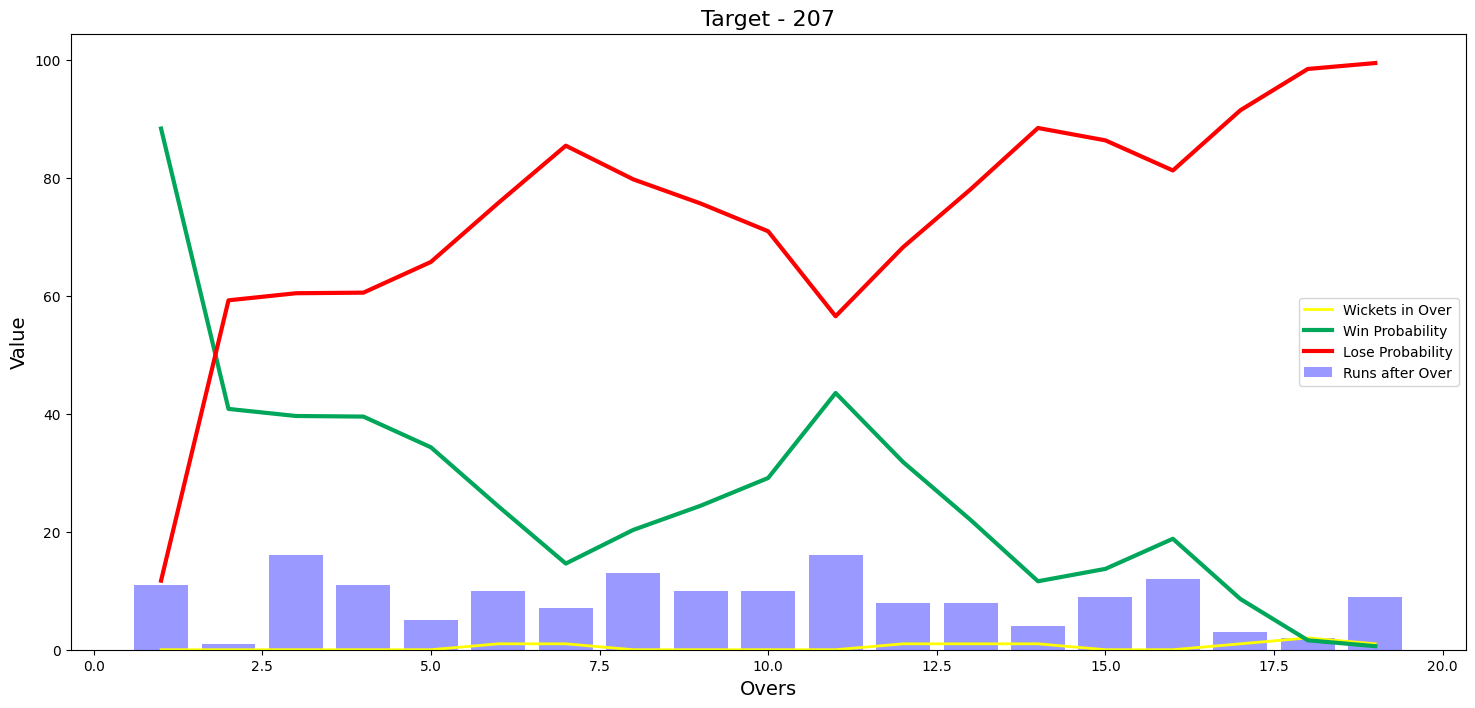

In [127]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'], temp_df['wickets_in_over'], 
         color='yellow', linewidth=2, label='Wickets in Over')
plt.plot(temp_df['end_of_over'], temp_df['win'], 
         color='#00a65a', linewidth=3, label='Win Probability')
plt.plot(temp_df['end_of_over'], temp_df['lose'], 
         color='red', linewidth=3, label='Lose Probability')
plt.bar(temp_df['end_of_over'], temp_df['runs_after_over'], 
        color='blue', alpha=0.4, label='Runs after Over')
plt.title('Target - ' + str(target), fontsize=16)
plt.xlabel('Overs', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend()
plt.show()

# Another match progression output 

In [128]:
temp_df,target = match_progression(delivery_df,19,pipe)
temp_df

Target- 159


,end_of_over,runs_after_over,wickets_in_over,lose,win,crr,rrr
2551,1,6,1,4.2,95.8,159.000000,8.052632
2557,2,9,0,15.1,84.9,79.500000,8.000000
2563,3,2,1,41.3,58.7,53.000000,8.352941
2569,4,4,0,49.7,50.3,39.750000,8.625000
2576,5,11,0,44.8,55.2,31.800000,8.466667
2582,6,15,0,33.0,67.0,26.500000,8.000000
2589,7,6,0,33.6,66.4,22.714286,8.153846
2595,8,4,0,36.5,63.5,19.875000,8.500000
2601,9,4,1,54.9,45.1,17.666667,8.909091
2607,10,1,2,85.4,14.6,15.900000,9.700000


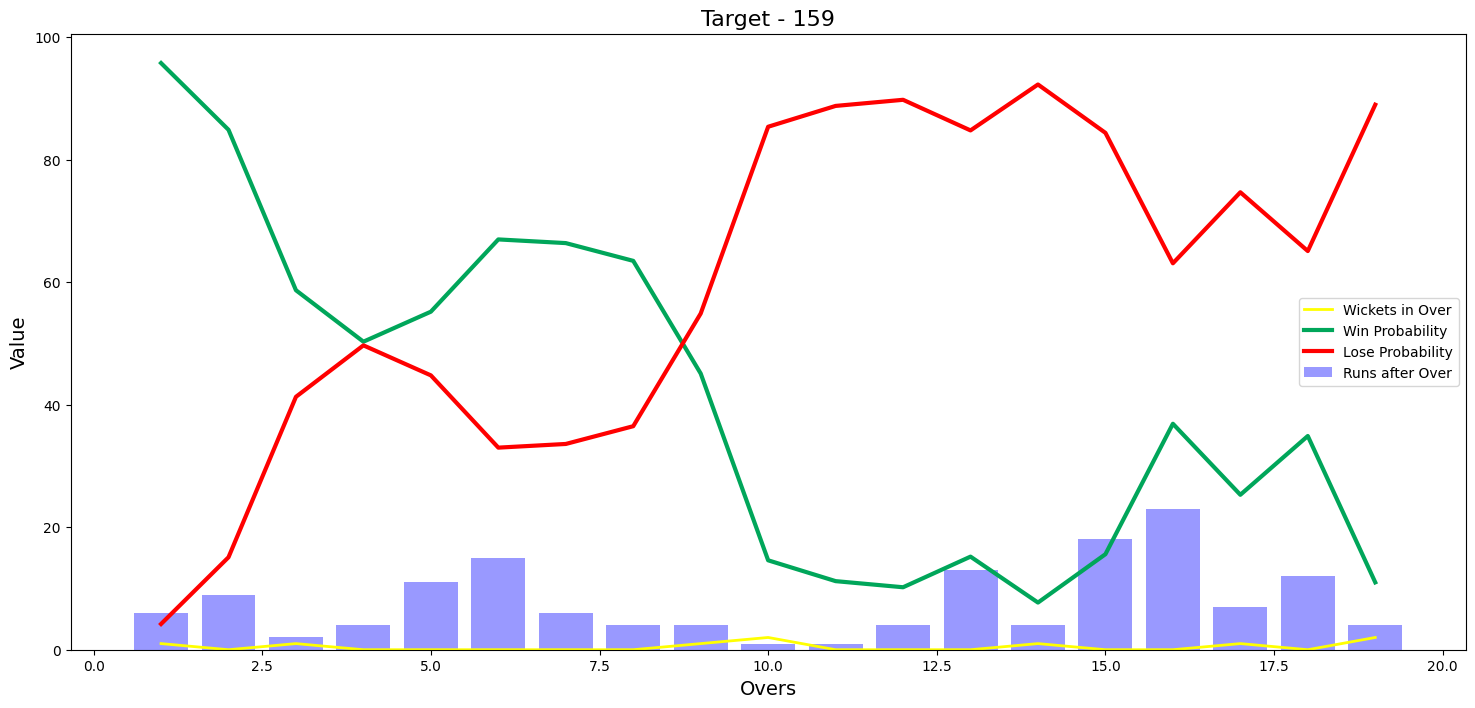

In [129]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'], temp_df['wickets_in_over'], 
         color='yellow', linewidth=2, label='Wickets in Over')
plt.plot(temp_df['end_of_over'], temp_df['win'], 
         color='#00a65a', linewidth=3, label='Win Probability')
plt.plot(temp_df['end_of_over'], temp_df['lose'], 
         color='red', linewidth=3, label='Lose Probability')
plt.bar(temp_df['end_of_over'], temp_df['runs_after_over'], 
        color='blue', alpha=0.4, label='Runs after Over')
plt.title('Target - ' + str(target), fontsize=16)
plt.xlabel('Overs', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend()
plt.show()

In [130]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win,crr,rrr
10459,1,4,0,3.4,96.6,178.000000,9.157895
10467,2,8,0,15.5,84.5,89.000000,9.222222
10473,3,1,0,30.3,69.7,59.333333,9.705882
10479,4,7,1,49.9,50.1,44.500000,9.875000
10485,5,12,0,44.0,56.0,35.600000,9.733333
10491,6,13,0,35.5,64.5,29.666667,9.500000
10497,7,9,0,32.2,67.8,25.428571,9.538462
10505,8,15,0,21.7,78.3,22.250000,9.083333
10511,9,7,0,20.6,79.4,19.777778,9.272727
10518,10,17,0,11.5,88.5,17.800000,8.500000


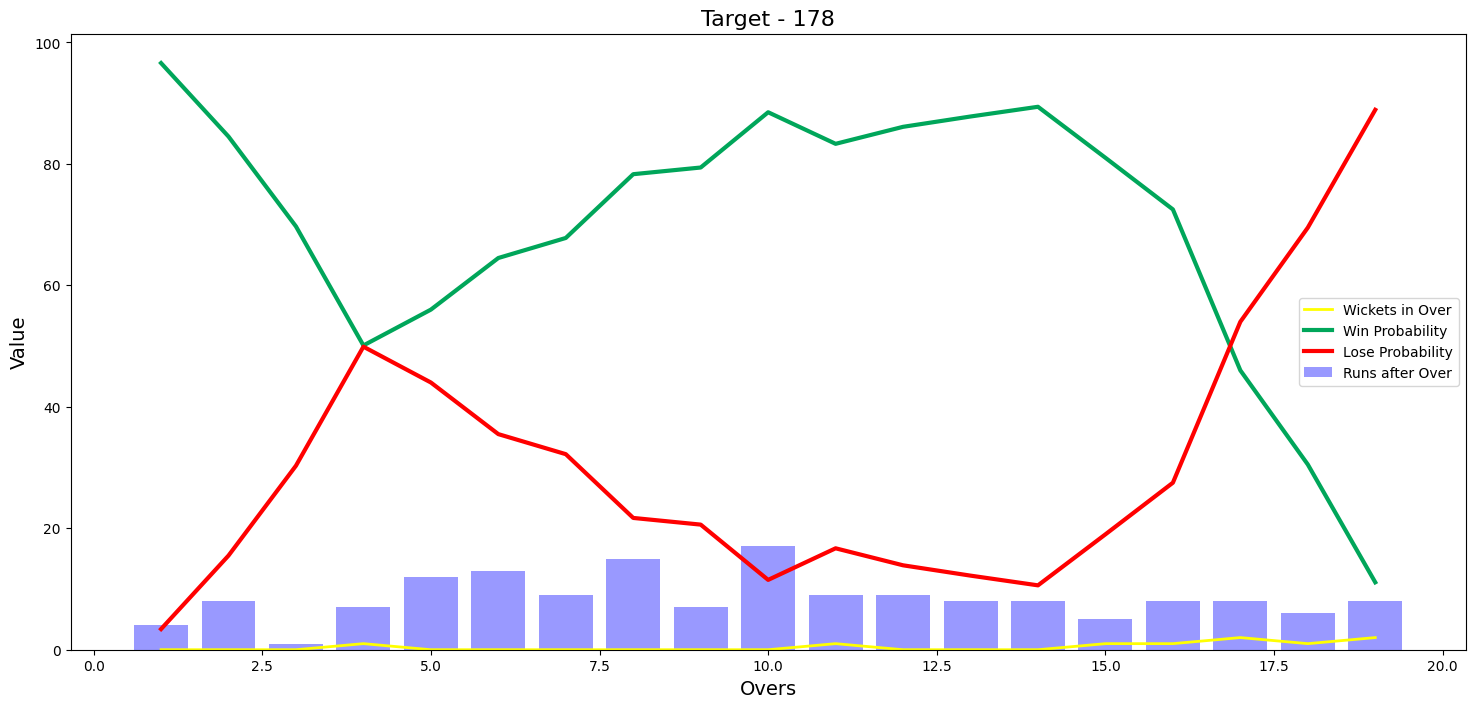

In [131]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'], temp_df['wickets_in_over'], 
         color='yellow', linewidth=2, label='Wickets in Over')
plt.plot(temp_df['end_of_over'], temp_df['win'], 
         color='#00a65a', linewidth=3, label='Win Probability')
plt.plot(temp_df['end_of_over'], temp_df['lose'], 
         color='red', linewidth=3, label='Lose Probability')
plt.bar(temp_df['end_of_over'], temp_df['runs_after_over'], 
        color='blue', alpha=0.4, label='Runs after Over')
plt.title('Target - ' + str(target), fontsize=16)
plt.xlabel('Overs', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend()
plt.show()

In [132]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [133]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

#  IPL Match Win Probability Prediction
This code predicts the win probability of batting and bowling teams 

using a trained ML pipeline (pipe) based on match situation.

In [134]:
input_df = pd.DataFrame({
    'batting_team': ["Kolkata Knight Riders"],
    'bowling_team': ["Kings XI Punjab"],
    'city': ["Dharamsala"],
    'runs_left': [50],
    'balls_left': [30],
    'wickets': [5],
    'total_runs_x': [180],
    'crr': [7.0],   
    'rrr': [10.0]   
})
display(input_df)
result = pipe.predict_proba(input_df)

loss = result[0][0]
win = result[0][1]

print("Win Probability for", input_df['batting_team'][0], ":", round(win*100), "%")
print("Win Probability for", input_df['bowling_team'][0], ":", round(loss*100), "%")

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
0,Kolkata Knight Riders,Kings XI Punjab,Dharamsala,50,30,5,180,7.0,10.0


Win Probability for Kolkata Knight Riders : 50 %
Win Probability for Kings XI Punjab : 50 %


In [135]:
import pickle
pickle.dump(pipe, open('pipe.pkl', 'wb'))
print("✅ Pipeline saved successfully as 'pipe.pkl'")

✅ Pipeline saved successfully as 'pipe.pkl'


In [136]:
import pickle
pipe = pickle.load(open('pipe.pkl', 'rb'))
print(type(pipe))

<class 'sklearn.pipeline.Pipeline'>


In [137]:
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression  

categorical_cols = ['batting_team', 'bowling_team', 'city']
numeric_cols = ['runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

model = LogisticRegression()  
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

pipe.fit(X_train, y_train)

pickle.dump(pipe, open('pipe.pkl', 'wb'))
print("✅ Saved pipeline successfully.")


✅ Saved pipeline successfully.


C:\Users\laptop\Desktop\IPL- probabilities prediction\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
